# Assignment 2 – Question 1: Otsu’s Thresholding on Noisy Synthetic Image

## Objective
To create a synthetic grayscale image with three distinct pixel intensity values (representing two objects and a background), then:
- Add Gaussian noise to the image.
- Apply Otsu's thresholding to segment the image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Step 1: Create a Synthetic Image with 3 Pixel Values

We will create a 100×100 grayscale image with:
- Background (value: 0)
- Object 1 (value: 85)
- Object 2 (value: 170)

These pixel values are manually assigned to separate regions.

Original Synthetic Image (3 intensity values):


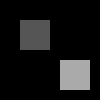

In [2]:
# Create a 100x100 image initialized with background (0)
synthetic_img = np.zeros((100, 100), dtype=np.uint8)

# Draw Object 1 - a rectangle (value: 85)
synthetic_img[20:50, 20:50] = 85

# Draw Object 2 - another rectangle (value: 170)
synthetic_img[60:90, 60:90] = 170

# Display the synthetic image
print("Original Synthetic Image (3 intensity values):")
cv2_imshow(synthetic_img)


## Step 2: Add Gaussian Noise to the Image

We simulate real-world conditions by adding Gaussian noise with:
- Mean = 0
- Standard deviation = 20

This helps test the robustness of Otsu’s thresholding.

Noisy Image with Gaussian Noise:


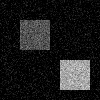

In [3]:
# Add Gaussian noise
mean = 0
std_dev = 20
gaussian_noise = np.random.normal(mean, std_dev, synthetic_img.shape)

# Add noise and clip to valid range [0, 255]
noisy_img = synthetic_img + gaussian_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Display the noisy image
print("Noisy Image with Gaussian Noise:")
cv2_imshow(noisy_img)


## Step 3: Apply Otsu’s Thresholding

We use OpenCV’s built-in `cv2.threshold()` with the Otsu flag to automatically determine the optimal threshold for separating foreground and background.

Result after Otsu's Thresholding:


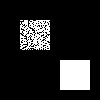

In [4]:
# Apply Otsu's thresholding
_, otsu_thresh_img = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display thresholded image
print("Result after Otsu's Thresholding:")
cv2_imshow(otsu_thresh_img)


## Visualize Histogram of Noisy Image

This histogram helps understand why Otsu's method works — it tries to find the optimal threshold that minimizes intra-class variance.


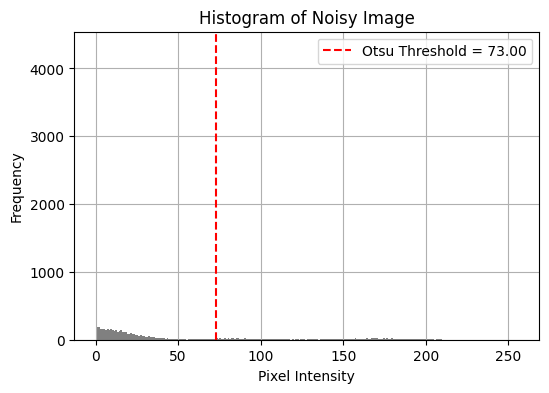

In [5]:
# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(noisy_img.ravel(), bins=256, range=(0,256), color='gray')
plt.title("Histogram of Noisy Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.axvline(x=_, color='red', linestyle='--', label=f'Otsu Threshold = {_:.2f}')
plt.legend()
plt.grid(True)
plt.show()
